In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fifa_main_df = pd.read_csv("data.csv",index_col=[0])

In [3]:
fifa_main_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa_main_df.shape

(18207, 88)

In [5]:
fifa_main_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [6]:
fifa_main_df.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [7]:
fifa_main_df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

Dropping columns which are irrelevant for our analysis

1) Photo of Player

2) Nationalality

3) National Flag

4) Current Club Logo

5) Real Face(not sure what this column means)

6) Loaned From

7) Current Club

8) Player ID

9) Date of Joining

10) Jersey Number.

In [8]:
fifa_main_df = fifa_main_df.drop(['Photo', 'Flag','Club','Club Logo','Real Face','Loaned From','Nationality','ID','Joined','Jersey Number'], axis=1)

In [9]:
fifa_main_df.head()

,Name,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,€110.5M,€565K,2202,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,94,94,€77M,€405K,2228,Right,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,92,93,€118.5M,€290K,2143,Right,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,91,93,€72M,€260K,1471,Right,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,91,92,€102M,€355K,2281,Right,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
fifa_main_df['Value'][0][-1]

'M'

In [11]:
fifa_main_df['Value'] = fifa_main_df['Value'].str.replace('€', '')    
#np.where("M" in fifa_main_df['Value'],fifa_main_df['Value'][:-1].astype(float) *1000000,fifa_main_df['Value'][:-1].astype(float) *1000)
for rows in range(len(fifa_main_df['Value'])):
    if "M" in fifa_main_df['Value'][rows] :
        fifa_main_df['Value'] = fifa_main_df['Value'].str.replace('M', '')
        fifa_main_df['Value'] = fifa_main_df['Value'].astype(float)
        fifa_main_df['Value'] = fifa_main_df['Value'] * 1000000
#else :
   # fifa_main_df['Value'] = fifa_main_df['Value'].str.replace('K', '')
   # fifa_main_df['Value'] = fifa_main_df['Value'].astype(float)
   # fifa_main_df['Value'] = fifa_main_df['Value'] * 1000

ValueError: could not convert string to float: '60K'

In [12]:
fifa_main_df['Weight'] = fifa_main_df['Weight'].str.replace('l', '')
fifa_main_df['Weight'] = fifa_main_df['Weight'].str.replace('b', '')
fifa_main_df['Weight'] = fifa_main_df['Weight'].str.replace('s', '')
fifa_main_df['Weight'] = fifa_main_df['Weight'].astype(float)

In [13]:
fifa_main_df['Value'] = fifa_main_df['Value'].str.replace('€', '')
fifa_main_df['Value'] = fifa_main_df['Value'].str.replace('K', '')
fifa_main_df['Value'] = fifa_main_df['Value'].str.replace('M', '')
fifa_main_df['Value'] = fifa_main_df['Value'].astype(float)


In [14]:
fifa_main_df['Wage'] = fifa_main_df['Wage'].str.replace('€', '')
fifa_main_df['Wage'] = fifa_main_df['Wage'].str.replace('K', '')
fifa_main_df['Wage'] = fifa_main_df['Wage'].astype(float)
fifa_main_df['Wage'] = fifa_main_df['Wage'] * 1000

In [15]:
fifa_main_df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
5        163.0
6        146.0
7        190.0
8        181.0
9        192.0
10       176.0
11       168.0
12       172.0
13       148.0
14       159.0
15       165.0
16       196.0
17       161.0
18       187.0
19       212.0
20       168.0
21       170.0
22       203.0
23       154.0
24       187.0
25       161.0
26       157.0
27       185.0
28       172.0
29       130.0
         ...  
18177    163.0
18178    176.0
18179    163.0
18180    172.0
18181    134.0
18182    165.0
18183    190.0
18184    179.0
18185    159.0
18186    174.0
18187    161.0
18188    148.0
18189    165.0
18190    176.0
18191    168.0
18192    165.0
18193    146.0
18194    187.0
18195    141.0
18196    146.0
18197    141.0
18198    154.0
18199    150.0
18200    157.0
18201    168.0
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

Inserting Binary values to indicate if a player is Left footed or Right Footed.

1 : Right Foot(More prominent)

0 : Left Foot

In [16]:
fifa_main_df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [17]:
#fifa_main_df['Preferred Foot'] = fifa_main_df['Preferred Foot'].map({'Right': 1, 'Left': 0})

Separating the main dataframe into multiple dataframes depending on player position

1) Goalkeepers

2) Defenders

3) Midfielders

4) Forwards

In [18]:
df_goalkeepers = fifa_main_df[fifa_main_df['Position'] == 'GK']
df_outfielders = fifa_main_df[fifa_main_df['Position'] != 'GK']

In [19]:
df_goalkeepers.shape

(2025, 78)

In [20]:
df_outfielders.shape

(16182, 78)

In [21]:
df_outfielders.head()

,Name,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,110.5,565000.0,2202,Left,5.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,94,94,77.0,405000.0,2228,Right,5.0,4.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,92,93,118.5,290000.0,2143,Right,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
4,K. De Bruyne,27,91,92,102.0,355000.0,2281,Right,4.0,5.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,91,91,93.0,340000.0,2142,Right,4.0,4.0,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M


In [22]:
fifa_main_df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [23]:
df_defenders = fifa_main_df[(fifa_main_df['Position'] == 'CB')  | 
                            (fifa_main_df['Position'] == 'LB')  | 
                            (fifa_main_df['Position'] == 'RB')  | 
                            (fifa_main_df['Position'] == 'RCB') | 
                            (fifa_main_df['Position'] == 'LCB') | 
                            (fifa_main_df['Position'] == 'RWB') | 
                            (fifa_main_df['Position'] == 'LWB')   ]

In [24]:
df_midfielders = fifa_main_df[(fifa_main_df['Position'] == 'CM')  | 
                            (fifa_main_df['Position'] == 'RM')    | 
                            (fifa_main_df['Position'] == 'LM')    | 
                            (fifa_main_df['Position'] == 'CAM')   | 
                            (fifa_main_df['Position'] == 'CDM')   | 
                            (fifa_main_df['Position'] == 'RCM')   | 
                            (fifa_main_df['Position'] == 'LCM')   |
                            (fifa_main_df['Position'] == 'RW')    |
                            (fifa_main_df['Position'] == 'LW')    |
                            (fifa_main_df['Position'] == 'RDM')   | 
                            (fifa_main_df['Position'] == 'LDM')   |
                            (fifa_main_df['Position'] == 'RAM')   |
                            (fifa_main_df['Position'] == 'LAM') ]

In [25]:
df_attackers = fifa_main_df[(fifa_main_df['Position'] == 'ST')  | 
                            (fifa_main_df['Position'] == 'LS')  | 
                            (fifa_main_df['Position'] == 'RS')  | 
                            (fifa_main_df['Position'] == 'CF')  | 
                            (fifa_main_df['Position'] == 'LS')  | 
                            (fifa_main_df['Position'] == 'RS')    ]

In [26]:
df_defenders.shape,df_midfielders.shape,df_attackers.shape,df_goalkeepers.shape

((5866, 78), (7589, 78), (2636, 78), (2025, 78))

In [27]:
5866+7589+2636+2025

18116

In [28]:
fifa_main_df.shape

(18207, 78)

In [29]:
fifa_main_df['Position'].isnull().sum()

60

In [30]:
fifa_main_df['Overall'].value_counts

<bound method IndexOpsMixin.value_counts of 0        94
1        94
2        92
3        91
4        91
5        91
6        91
7        91
8        91
9        90
10       90
11       90
12       90
13       90
14       89
15       89
16       89
17       89
18       89
19       89
20       89
21       89
22       89
23       89
24       89
25       88
26       88
27       88
28       88
29       88
         ..
18177    48
18178    48
18179    48
18180    48
18181    48
18182    48
18183    48
18184    48
18185    48
18186    47
18187    47
18188    47
18189    47
18190    47
18191    47
18192    47
18193    47
18194    47
18195    47
18196    47
18197    47
18198    47
18199    47
18200    47
18201    47
18202    47
18203    47
18204    47
18205    47
18206    46
Name: Overall, Length: 18207, dtype: int64>

In [31]:
df_weird = fifa_main_df[fifa_main_df['Overall'] >= 100]

In [32]:
df_weird

,Name,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


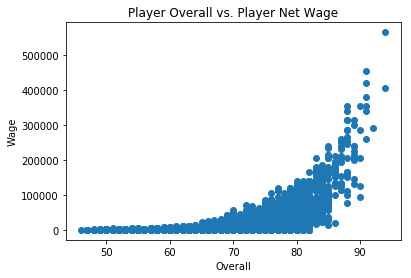

In [33]:
plt.scatter(fifa_main_df['Overall'], fifa_main_df['Wage'])
plt.title("Player Overall vs. Player Net Wage")
plt.xlabel("Overall")
plt.ylabel("Wage")
plt.show()

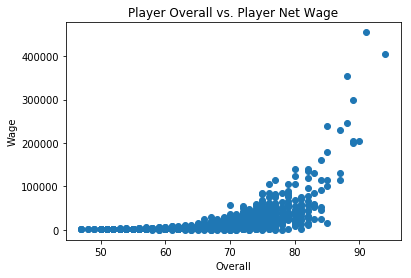

In [34]:
plt.scatter(df_attackers['Overall'], df_attackers['Wage'])
plt.title("Player Overall vs. Player Net Wage")
plt.xlabel("Overall")
plt.ylabel("Wage")
plt.show()

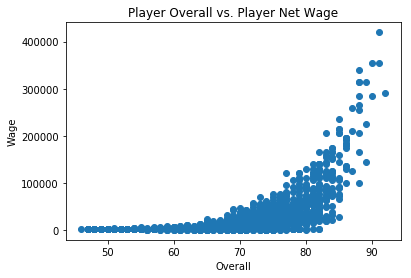

In [35]:
plt.scatter(df_midfielders['Overall'], df_midfielders['Wage'])
plt.title("Player Overall vs. Player Net Wage")
plt.xlabel("Overall")
plt.ylabel("Wage")
plt.show()

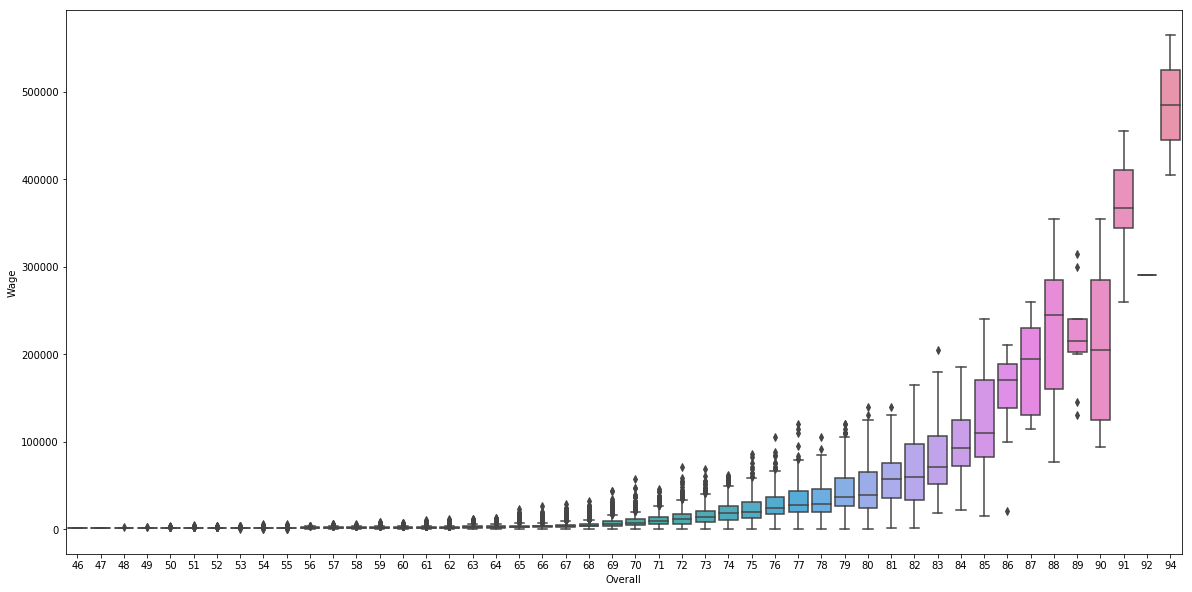

In [36]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Overall", y="Wage", data=fifa_main_df)

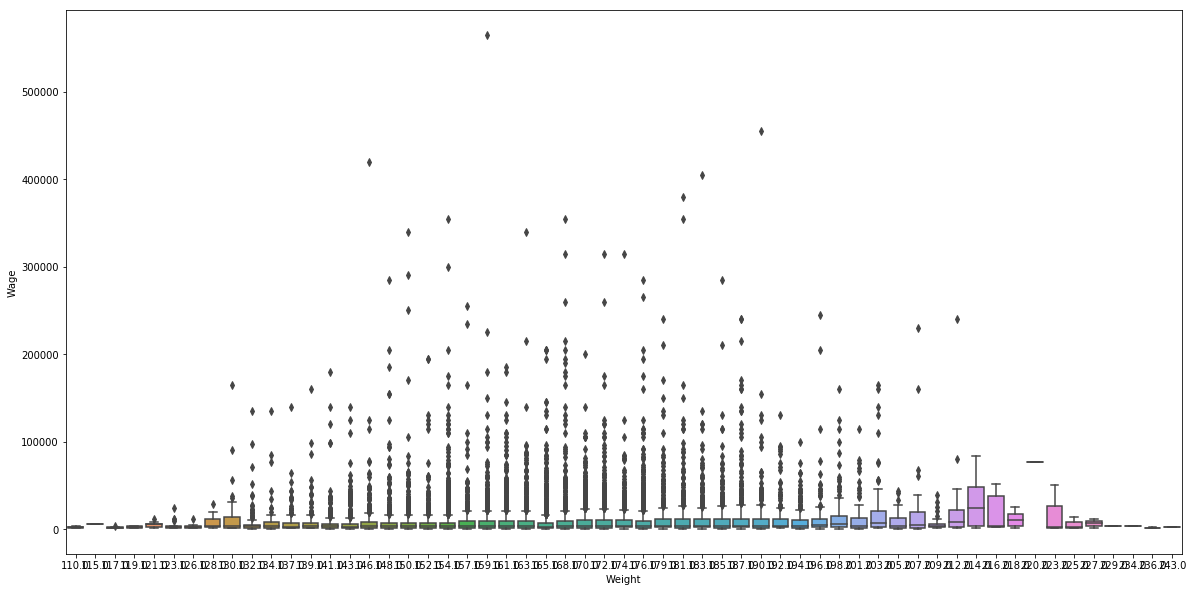

In [37]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Weight", y="Wage", data=fifa_main_df)

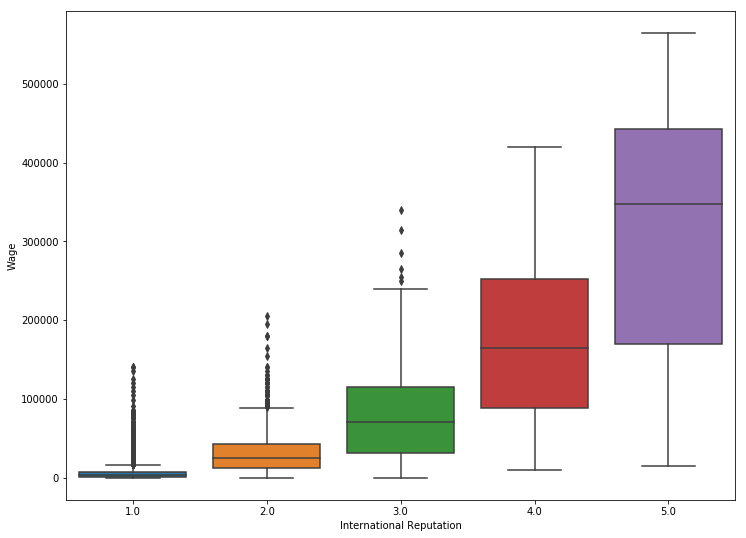

In [38]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(x="International Reputation", y="Wage", data=fifa_main_df)

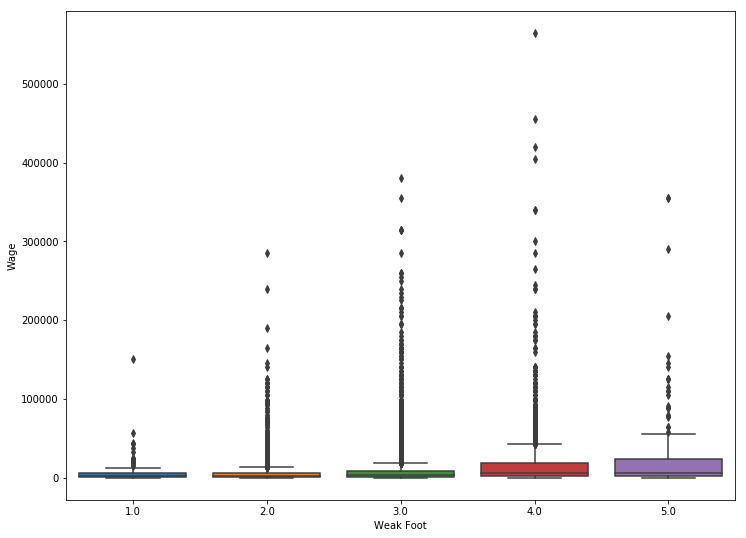

In [39]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(x="Weak Foot", y="Wage", data=fifa_main_df)

In [40]:
df_goalkeepers

,Name,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,De Gea,27,91,93,72.0,260000.0,1471,Right,4.0,3.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
9,J. Oblak,25,90,93,68.0,94000.0,1331,Right,3.0,3.0,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M
18,M. ter Stegen,26,89,92,58.0,240000.0,1328,Right,3.0,4.0,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
19,T. Courtois,26,89,90,53.5,240000.0,1311,Left,4.0,2.0,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
22,M. Neuer,32,89,89,38.0,130000.0,1473,Right,5.0,4.0,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,€62.7M
37,H. Lloris,31,88,88,36.0,150000.0,1335,Left,4.0,1.0,...,65.0,29.0,10.0,18.0,88.0,84.0,68.0,83.0,92.0,€66.6M
40,S. Handanovič,33,88,88,30.0,110000.0,1262,Right,3.0,2.0,...,69.0,25.0,10.0,13.0,87.0,86.0,69.0,89.0,89.0,€51M
41,G. Buffon,40,88,88,4.0,77000.0,1334,Right,4.0,2.0,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
46,K. Navas,31,87,87,30.5,195000.0,1345,Right,3.0,3.0,...,67.0,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,€62.5M
57,Ederson,24,86,90,41.5,125000.0,1463,Left,2.0,3.0,...,70.0,28.0,15.0,8.0,85.0,80.0,91.0,82.0,87.0,€79.9M


In [41]:
df_goalkeepers.shape

(2025, 78)

In [42]:
df_goalkeepers.isnull().sum()

Name                           0
Age                            0
Overall                        0
Potential                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                       0
Contract Valid Until          33
Height                         0
Weight                         0
LS                          2025
ST                          2025
RS                          2025
LW                          2025
LF                          2025
CF                          2025
RF                          2025
RW                          2025
LAM                         2025
CAM                         2025
RAM                         2025
LM                          2025
LCM                         2025
          

In [43]:
df_goalkeepers = df_goalkeepers.drop(['Crossing',
                                      'Finishing',
                                      'HeadingAccuracy',
                                      'ShortPassing',
                                      'Volleys',
                                      'Dribbling',
                                      'Curve',
                                      'FKAccuracy',
                                      'LongPassing',
                                      'BallControl',
                                      'Acceleration',
                                      'SprintSpeed',
                                      'Agility',
                                      'Balance',
                                      'ShotPower',
                                      'Jumping',
                                      'Stamina',
                                      'Position',
                                      'Strength',
                                      'LongShots',
                                      'Aggression',
                                      'Interceptions',
                                      'Positioning',
                                      'Penalties',
                                      'Marking',
                                      'StandingTackle',
                                      'SlidingTackle',
                                      'Contract Valid Until',
                                      'Release Clause',
                                      'LS','ST','RS','LW','LF','CF','RF',
                                      'RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LDM','RDM','CDM',
                                      'LWB','RWB','LB','LCB','CB','RCB','RB'
                                       ], axis=1)

In [44]:
df_goalkeepers.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Height', 'Weight',
       'Reactions', 'Vision', 'Composure', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [45]:
df_goalkeepers['Work Rate'].value_counts()

Medium/ Medium    2025
Name: Work Rate, dtype: int64

In [46]:
df_goalkeepers['Body Type'].value_counts()

Normal      1445
Lean         443
Stocky       136
Courtois       1
Name: Body Type, dtype: int64

In [47]:
df_goalkeepers = df_goalkeepers.drop(['Work Rate'],axis=1)

In [48]:
df_goalkeepers.dtypes

Name                         object
Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Body Type                    object
Height                       object
Weight                      float64
Reactions                   float64
Vision                      float64
Composure                   float64
GKDiving                    float64
GKHandling                  float64
GKKicking                   float64
GKPositioning               float64
GKReflexes                  float64
dtype: object

In [49]:
fifa_main_df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
PLAYER_BODY_TYPE_25        1
Neymar                     1
Courtois                   1
Akinfenwa                  1
C. Ronaldo                 1
Shaqiri                    1
Name: Body Type, dtype: int64

In [50]:
df_goalkeepers['Body Type'] = df_goalkeepers['Body Type'].str.replace('Courtois','Lean')

In [51]:
df_goalkeepers['Body Type'].value_counts()

Normal    1445
Lean       444
Stocky     136
Name: Body Type, dtype: int64